In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
IMAGE_SIZE = 256
BATCH_SIZE =32 # per BATCH_Size =32 mean it have 32 rows of data or you can say 32 elements for every attributes
CHANNELS = 3    
EPOCHS = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Potato-disease/Potato_Diseases",
    shuffle =True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
# its loaded DataSet and create three classes 

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names # its our title of images

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

Inside data set there are the folders which is our dataset classes

In [7]:
# length of the Data set 
len(dataset)

68

In [8]:
# here you can say its create 68 batch of 32for every elements(column name ) 
# per bacth have 32 
2152/32

67.25

In [9]:
# lets check 

for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape) # its convert to numpy bcz its in tensor
  print(label_batch.numpy()) # its convert to numpy bcz its in tensor
  print(image_batch.numpy()) # its convert to numpy bcz its in tensor
  # lets print for single image
  print("\nSingle image\n") 
  print(image_batch[0].numpy())
  print(image_batch[0].shape)


(32, 256, 256, 3)
[0 0 0 1 0 2 0 2 0 0 0 2 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1]
[[[[142. 139. 150.]
   [132. 129. 140.]
   [125. 122. 133.]
   ...
   [128. 126. 137.]
   [128. 126. 137.]
   [130. 128. 139.]]

  [[131. 128. 139.]
   [124. 121. 132.]
   [121. 118. 129.]
   ...
   [126. 124. 135.]
   [134. 132. 143.]
   [144. 142. 153.]]

  [[130. 127. 138.]
   [126. 123. 134.]
   [126. 123. 134.]
   ...
   [126. 124. 135.]
   [129. 127. 138.]
   [136. 134. 145.]]

  ...

  [[185. 183. 194.]
   [190. 188. 199.]
   [192. 190. 201.]
   ...
   [168. 166. 179.]
   [168. 166. 179.]
   [168. 166. 179.]]

  [[186. 184. 195.]
   [190. 188. 199.]
   [191. 189. 200.]
   ...
   [168. 166. 179.]
   [168. 166. 179.]
   [166. 164. 177.]]

  [[189. 187. 198.]
   [190. 188. 199.]
   [188. 186. 197.]
   ...
   [165. 163. 176.]
   [163. 161. 174.]
   [161. 159. 172.]]]


 [[[171. 174. 179.]
   [171. 174. 181.]
   [171. 174. 183.]
   ...
   [120. 116. 130.]
   [139. 135. 149.]
   [144. 140. 154.]]

  [[

(32, 256, 256, 3) it means 
* 32 = Number of rows for all element into one batch 
* 256, 256 is image size
* 3 is RGB 3D array every number is between 0-255

[0 1 0 0 0 0 0 2 2 1 0 0 1 2 1 1 0 0 0 0 1 0 1 1 0 0 2 1 2 0 1 0] it means
* 0 = class-one 
* 1 = class-two
* 2 = class-three 


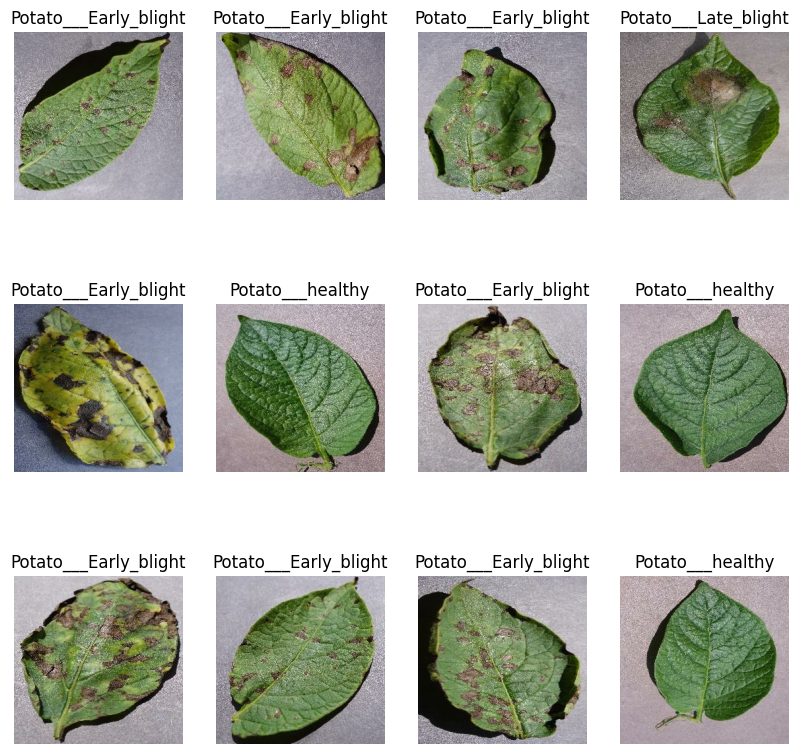

In [10]:
# show first image 
plt.figure(figsize =(10,10)) # it means showing each image space between 10 by 10 
for i in range(12):
  ax = plt.subplot(3,4, i+1) # it means ploting all images in 3X4 matric
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(class_names[label_batch[i]]) 
  # this is our title of the image  
  plt.axis("off")

plt.imshow(image_batch[0].numpy().astype("uint8"))
it means 
inside the plt.imshow function we can pass the 
* image_batch[0].numpy() = convert tensor to numpy and show the first image
* astype("uint8") = it is float so we can use astype("unint8") to convert it in  int   

# Spliting the dataset into training and test 
* 80% ==> training
* 20% ==> 10% validation, 10% test
* after Epoch we use the 10% validation
* when we use final dataset then we will use 10% test data set we use the accuracy of our model 

In [11]:
train_size = 0.8 # 80% of training data set 
len(dataset)*train_size 
# it means its take only 54 batchs from training dataset reamining Batchs are in test and validation

54.400000000000006

In [12]:
train_ds = dataset.take(54) # it means we take first 54 batches from dataset
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54) # it means its skip first 54 batches from dataset like array[54:]
len(test_ds) 

14

In [14]:
# for validation 
val_size = 0.1 # 10% of validation
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds = test_ds.take(6) # here we take 6 batches from test_ds dataset
len(val_ds)

6

In [16]:
# now we skip first 6 batches from test_ds and remaining are test_ds batches
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
      ds = ds.shuffle(shuffle_size, seed=12)
    train_size  = int(train_split*ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)

    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds





In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)


])

In [24]:
data_augmentation = tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Creating/Building Model Using CNN

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3 # here i am taking three neurons

model = models.Sequential([
    resize_and_rescale, 
    data_augmentation,
    layers.Conv2D(32, (3,3), activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation= 'softmax')

])

model.build(input_shape = input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

#Compile

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


#Fitting Model

In [28]:
history = model.fit(
    train_ds,
    epochs =EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 19s 148ms/step - loss: 0.8160 - accuracy: 0.5828 - val_loss: 0.6462 - val_accuracy: 0.7292
Epoch 2/50
54/54 [==============================] - 3s 62ms/step - loss: 0.4297 - accuracy: 0.8356 - val_loss: 0.3994 - val_accuracy: 0.8333
Epoch 3/50
54/54 [==============================] - 3s 62ms/step - loss: 0.3289 - accuracy: 0.8692 - val_loss: 0.4417 - val_accuracy: 0.8802
Epoch 4/50
54/54 [==============================] - 3s 64ms/step - loss: 0.2310 - accuracy: 0.9109 - val_loss: 0.4891 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 3s 64ms/step - loss: 0.2824 - accuracy: 0.8854 - val_loss: 0.4656 - val_accuracy: 0.8438
Epoch 6/50
54/54 [==============================] - 3s 64ms/step - loss: 0.2337 - accuracy: 0.9086 - val_loss: 0.2053 - val_accuracy: 0.9427
Epoch 7/50
54/54 [==============================] - 3s 63ms/step - loss: 0.1649 - accuracy: 0.9352 - val_loss: 0.2507 - val_accuracy: 0.9010
Epoch 8/50


In [29]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 28ms/step - loss: 0.0615 - accuracy: 0.9844


In [30]:
scores

[0.061497434973716736, 0.984375]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
history.history['accuracy']

[0.5827546119689941,
 0.8356481194496155,
 0.8692129850387573,
 0.9108796119689941,
 0.8854166865348816,
 0.9085648059844971,
 0.9351851940155029,
 0.9288194179534912,
 0.9317129850387573,
 0.9155092835426331,
 0.9403935074806213,
 0.9386574029922485,
 0.9513888955116272,
 0.9328703880310059,
 0.9456018805503845,
 0.9461805820465088,
 0.9467592835426331,
 0.9600694179534912,
 0.9618055820465088,
 0.9664351940155029,
 0.9681712985038757,
 0.9641203880310059,
 0.9670138955116272,
 0.9733796119689941,
 0.9502314925193787,
 0.9618055820465088,
 0.9594907164573669,
 0.9652777910232544,
 0.9791666865348816,
 0.9733796119689941,
 0.9768518805503845,
 0.9814814925193787,
 0.9728009104728699,
 0.9785879850387573,
 0.9837962985038757,
 0.9791666865348816,
 0.9820601940155029,
 0.9849537014961243,
 0.9849537014961243,
 0.9895833134651184,
 0.9820601940155029,
 0.9866898059844971,
 0.9861111044883728,
 0.9872685074806213,
 0.9913194179534912,
 0.9884259104728699,
 0.9832175970077515,
 0.9855324029

In [35]:
len(history.history['accuracy'])

50

#Plotting

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

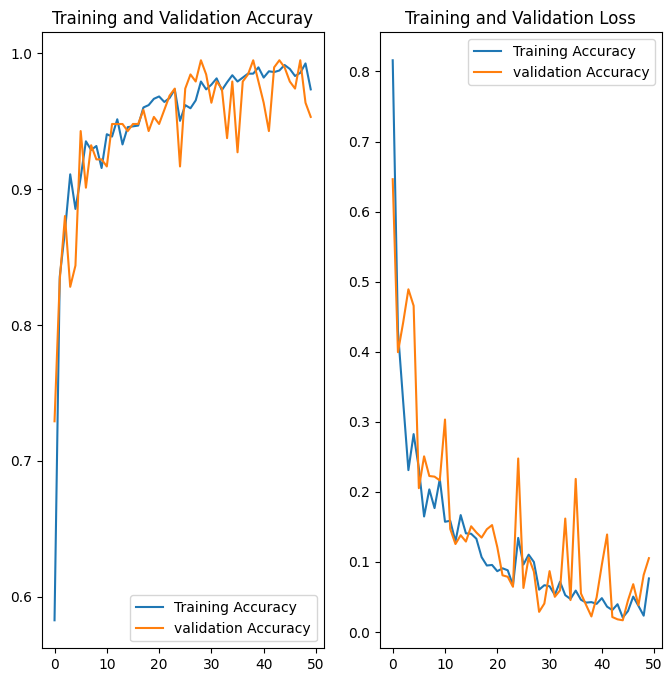

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuray')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Accuracy')
plt.plot(range(EPOCHS), val_loss, label='validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Run Prediction on a sample image

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 36ms/step
[1.5415650e-04 1.0494814e-02 9.8935097e-01]
predicted label: Potato___healthy


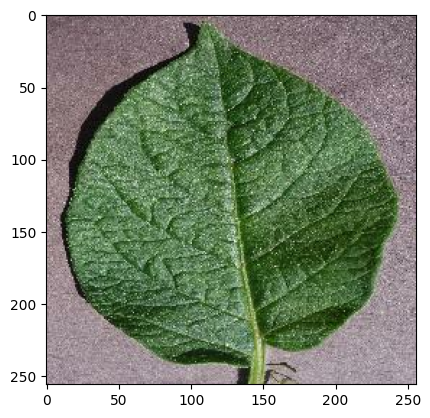

In [54]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    # print("image_batch", images_batch)
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0]) 
    # batch_prediction[0] will give n_classes three dimensional  array because we use three neurons and which probability is heigh 
    # whatever is heights probability that is our predicted class 
    # and using Softmax bcz softmax is for probability  
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    

In [51]:
np.argmax([6.558184e-04, 9.947864e-01, 4.557779e-03])
# its take heigher value of index 


1

In [55]:
print("predicted label:", class_names[np.argmax(batch_prediction[0])])

predicted label: Potato___healthy


#Write a function for inference

In [56]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    #we convert a image into an image_array 
    img_array = tf.expand_dims(img_array, 0)# create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

1/1 [==============================] - 0s 22ms/step


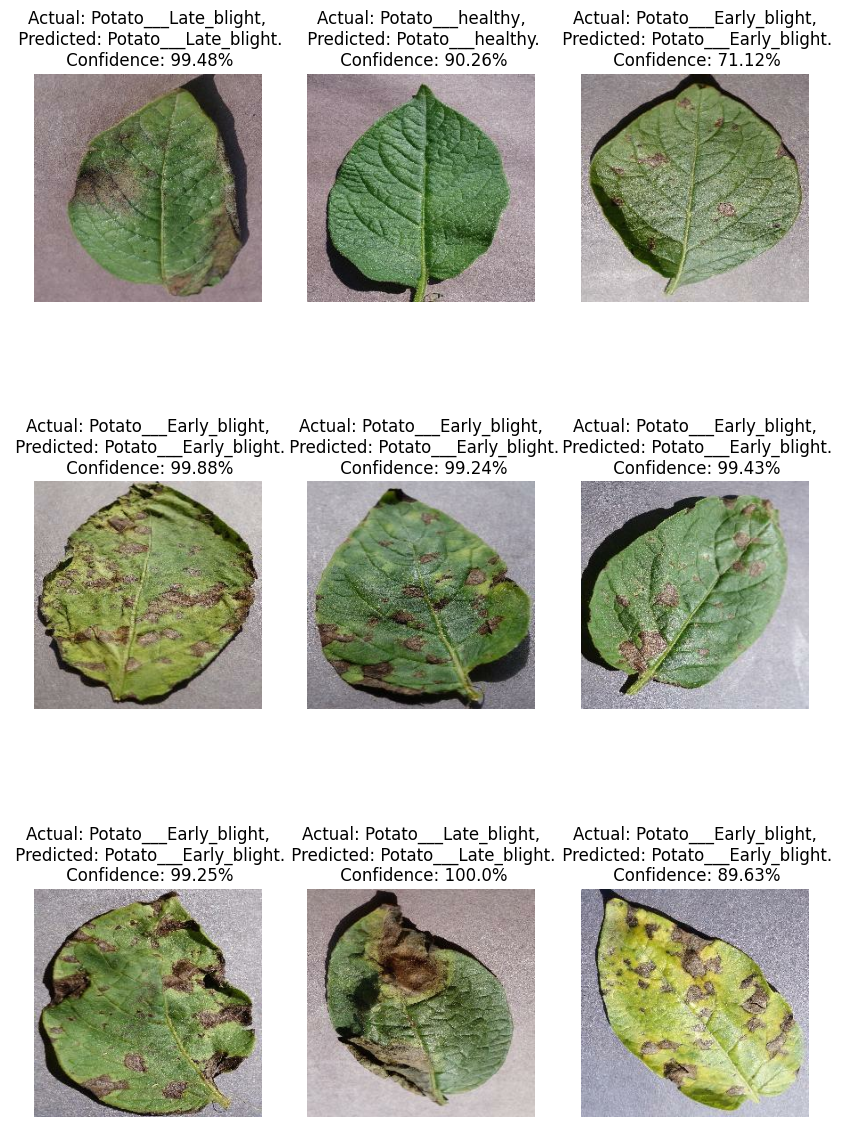

In [57]:
plt.figure(figsize=(15, 15))
print(test_ds)
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")